<a href="https://colab.research.google.com/github/yogeshjadhav1997/machine-learning-Project/blob/main/Yogesh_Jadhav_zomato__stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imported Required Libraries
import numpy as np
import pandas as pd



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Imported Data 
df=pd.read_csv('/content/drive/MyDrive/Dataset_DL/ZOMATO.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Prev Traded Quantity
0,ZOMATO,EQ,23-Jul-21,76.00,116.00,138.90,115.00,125.30,126.00,124.12,694895290,8.625275e+10,2428917,420490932,60.51,NaN
1,ZOMATO,EQ,26-Jul-21,126.00,126.35,143.75,125.30,138.05,140.65,134.63,249723854,3.362032e+10,1034160,56416984,22.59,694895290.0
2,ZOMATO,EQ,27-Jul-21,140.65,141.70,147.80,127.75,130.65,132.90,141.09,240341900,3.390968e+10,1075475,49747283,20.7,249723854.0
3,ZOMATO,EQ,28-Jul-21,132.90,131.00,135.00,123.55,133.00,131.20,127.90,159793731,2.043701e+10,627048,30085262,18.83,240341900.0
4,ZOMATO,EQ,29-Jul-21,131.20,134.95,144.00,132.20,142.25,141.55,137.73,117973089,1.624880e+10,489222,23022932,19.52,159793731.0


In [4]:
df.shape

(259, 16)

In [5]:
df.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'Prev Traded Quantity'],
      dtype='object')

In [6]:
#We Only Get those Columns are required for us this analysis
newdata=df.drop(['Symbol', 'Series','Date','Last Price', 'Close Price','Turnover',
                 'No. of Trades','Average Price', 'Deliverable Qty','% Dly Qt to Traded Qty',
      ],axis=1)

In [7]:
newdata.columns

Index(['Prev Close', 'Open Price', 'High Price', 'Low Price',
       'Total Traded Quantity', 'Prev Traded Quantity'],
      dtype='object')

In [8]:
#We Only Get those Columns are required for us this analysis

newdata.rename(columns = {'Open Price':'Open', 'High Price':'High','Low Price':'Low', 'Total Traded Quantity':'Volume','Prev Close':'Previous_Close', 'Prev Traded Quantity':'Previous_Volume',}, inplace = True)

newdata.head()

,Previous_Close,Open,High,Low,Volume,Previous_Volume
0,76.00,116.00,138.90,115.00,694895290,NaN
1,126.00,126.35,143.75,125.30,249723854,694895290.0
2,140.65,141.70,147.80,127.75,240341900,249723854.0
3,132.90,131.00,135.00,123.55,159793731,240341900.0
4,131.20,134.95,144.00,132.20,117973089,159793731.0


In [9]:
newdata.shape

(259, 6)

In [10]:
newdata.head()

,Previous_Close,Open,High,Low,Volume,Previous_Volume
0,76.00,116.00,138.90,115.00,694895290,NaN
1,126.00,126.35,143.75,125.30,249723854,694895290.0
2,140.65,141.70,147.80,127.75,240341900,249723854.0
3,132.90,131.00,135.00,123.55,159793731,240341900.0
4,131.20,134.95,144.00,132.20,117973089,159793731.0


In [11]:
##Statistical Information
newdata.describe()

,Previous_Close,Open,High,Low,Volume,Previous_Volume
count,259.000000,259.000000,259.000000,259.000000,2.590000e+02,2.580000e+02
mean,103.762355,104.195946,106.506564,101.190927,5.093538e+07,4.880843e+07
std,34.817215,35.109630,35.719548,34.245809,8.265749e+07,7.538297e+07
min,41.650000,40.850000,44.400000,40.600000,2.788656e+06,2.788656e+06
25%,73.000000,73.275000,74.625000,70.325000,1.509118e+07,1.506415e+07
50%,94.550000,97.200000,98.500000,93.600000,2.781234e+07,2.761068e+07
75%,136.600000,137.025000,139.175000,133.275000,4.658320e+07,4.622707e+07
max,160.300000,161.150000,169.000000,154.250000,6.948953e+08,6.948953e+08


In [12]:
#drop null values
newdata=newdata.dropna()


In [13]:
newdata.isnull().sum()

Previous_Close     0
Open               0
High               0
Low                0
Volume             0
Previous_Volume    0
dtype: int64

# Explore Data :

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


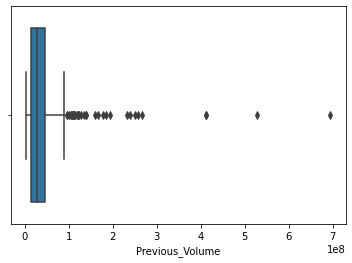

In [15]:
#Finding Outliers (An outlier is an observation of a data point that lies an abnormal distance from other values in a given population)
sns.boxplot(newdata['Previous_Volume'])
plt.show()

IQR=*Q3*-Q1 (Interquartile range)


In [16]:
#To Remove this Outliers

q1=newdata['Previous_Volume'].quantile(.25)
q3=newdata['Previous_Volume'].quantile(.75)

iqr=q3-q1

iqr



31162918.0

In [17]:
q1

15064151.25

In [18]:
q3

46227069.25

In [20]:
TopRange=q3+iqr*1.5
print(TopRange)
ButtomRange=q1+iqr*1.5
print(ButtomRange)

92971446.25
61808528.25


In [22]:
Data=newdata

In [51]:
Data[Data['Previous_Volume']> TopRange]

,Previous_Close,Open,High,Low,Volume,Previous_Volume
1,126.00,126.35,143.75,125.30,249723854,694895290.0
2,140.65,141.70,147.80,127.75,240341900,249723854.0
3,132.90,131.00,135.00,123.55,159793731,240341900.0
4,131.20,134.95,144.00,132.20,117973089,159793731.0
5,141.55,142.60,142.70,131.00,88312522,117973089.0
14,135.65,135.65,137.40,132.05,51256670,111702781.0
30,149.75,149.25,149.35,143.25,34811620,113381518.0
36,144.10,142.95,145.00,140.75,38892545,112358935.0
77,153.00,149.00,163.30,142.35,121197599,140547798.0
78,160.30,161.15,169.00,153.80,109342731,121197599.0


In [50]:
Data[Data['Previous_Volume']< ButtomRange]

,Previous_Close,Open,High,Low,Volume,Previous_Volume
8,139.40,139.80,141.00,135.25,41134419,46610001.0
9,138.40,138.75,138.90,132.00,38437134,41134419.0
10,134.95,135.50,136.20,130.10,31975356,38437134.0
11,131.35,132.40,133.55,127.25,41358299,31975356.0
12,130.60,131.00,131.45,122.10,43164004,41358299.0
...,...,...,...,...,...,...
247,53.95,54.50,54.50,53.20,37683099,35427093.0
248,53.40,53.35,54.45,52.70,29402446,37683099.0
249,53.50,53.75,54.00,52.90,27302087,29402446.0
250,76.00,53.65,53.65,53.65,2788656,27302087.0


In [52]:
DF=Data[Data['Previous_Volume']< TopRange] 
DF2=Data[Data['Previous_Volume']> ButtomRange]

In [53]:
NewData=pd.concat([DF,DF2],axis=0)

In [56]:
NewData.shape

(266, 6)

In [101]:
NewData.corr()

,Previous_Close,Open,High,Low,Volume,Previous_Volume
Previous_Close,1.000000,0.998429,0.995422,0.994865,-0.228586,-0.151028
Open,0.998429,1.000000,0.996812,0.996128,-0.228128,-0.154413
High,0.995422,0.996812,1.000000,0.994958,-0.195197,-0.126191
Low,0.994865,0.996128,0.994958,1.000000,-0.246434,-0.163855
Volume,-0.228586,-0.228128,-0.195197,-0.246434,1.000000,0.721407
Previous_Volume,-0.151028,-0.154413,-0.126191,-0.163855,0.721407,1.000000


In [102]:
Data1=NewData.drop(columns=['High','Low'])

In [105]:
Data2=Data1.fillna(Data1.mean())
Data2

,Previous_Close,Open,Volume,Previous_Volume
6,133.50,135.75,66909732,88312522.0
7,139.70,137.00,46610001,66909732.0
8,139.40,139.80,41134419,46610001.0
9,138.40,138.75,38437134,41134419.0
10,134.95,135.50,31975356,38437134.0
...,...,...,...,...
254,43.95,44.90,267544569,411205172.0
255,45.70,45.60,177187972,267544569.0
256,46.80,46.80,135944043,177187972.0
257,46.30,50.00,528899748,135944043.0


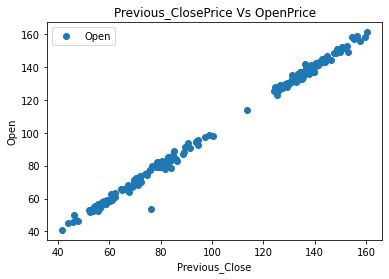

In [107]:
Data2.plot(x="Previous_Close",y="Open",style='o')
plt.title("Previous_ClosePrice Vs OpenPrice")
plt.xlabel("Previous_Close")
plt.ylabel("Open")
plt.show()

# **Split Data**

In [108]:

X=Data2.drop('Open',axis=1)
y=Data2['Open']

In [110]:
print(X.shape)
print(y.shape)

(266, 3)
(266,)


In [111]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print("Shape of X_train :",X_train.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of X_Test :",X_test.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (186, 3)
Shape of y_train : (186,)
Shape of X_Test : (80, 3)
Shape of y_test : (80,)


## **Lener Regression Model**

In [125]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [128]:
lr.fit(X_train,y_train)

LinearRegression()

In [129]:
lr.coef_

array([ 1.00561197e+00,  3.46307018e-09, -6.56773619e-09])

In [130]:
lr.intercept_

-0.10572724116518373

In [131]:
y_pred=lr.predict(X_test)

In [132]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

print(df2)

     Actual   Predicted
244   56.20   55.740218
1    126.35  122.902303
207   65.70   64.299109
194   59.30   61.286209
60   138.50  139.169002
..      ...         ...
245   54.70   53.946691
3    131.00  132.514978
36   142.95  144.199701
14   135.65  135.749407
240   54.70   54.936454

[80 rows x 2 columns]


In [134]:
from sklearn import metrics
print("R_square:",metrics.r2_score(y_test,y_pred))

R_square: 0.9925744606979079
